In [ ]:
# Use Case for Clustering: Group countries with similar construction permit trends, which can help understand regional or economic similarities.
# Index measuring the regulatory performance of obtaining Construction Permits

### Insight: Importing necessary libraries to handle data manipulation, visualization, and clustering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Insight: Loading the dataset. It's important to understand the structure of the data before applying clustering.

In [3]:
df=pd.read_csv("main_data.csv")

In [5]:
df

,Unnamed: 0,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
0,0,AFG,33.70269,34.53602,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822
...,...,...,...,...,...
186,186,XKX,50.29844,55.28702,52.87432
187,187,YEM,0.00000,0.00000,0.00000
188,188,ZAF,68.26741,68.32331,68.24925
189,189,ZMB,71.10859,72.09460,71.72488


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 191 non-null    int64  
 1   country                                    191 non-null    object 
 2   fy2017, Dealing with construction permits  191 non-null    float64
 3   fy2019, Dealing with construction permits  191 non-null    float64
 4   fy2018, Dealing with construction permits  191 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [9]:
df.head()

,Unnamed: 0,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
0,0,AFG,33.70269,34.53602,34.53602
1,1,AGO,64.57157,65.32993,64.99177
2,2,ALB,52.60171,52.67715,52.64734
3,3,ARE,86.51006,89.75407,86.52729
4,4,ARG,48.96341,56.44015,49.26822


In [11]:
df.tail()

,Unnamed: 0,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
186,186,XKX,50.29844,55.28702,52.87432
187,187,YEM,0.00000,0.00000,0.00000
188,188,ZAF,68.26741,68.32331,68.24925
189,189,ZMB,71.10859,72.09460,71.72488
190,190,ZWE,46.39289,60.00173,48.55427


In [13]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [15]:
df.head()

,country,"fy2017, Dealing with construction permits","fy2019, Dealing with construction permits","fy2018, Dealing with construction permits"
0,AFG,33.70269,34.53602,34.53602
1,AGO,64.57157,65.32993,64.99177
2,ALB,52.60171,52.67715,52.64734
3,ARE,86.51006,89.75407,86.52729
4,ARG,48.96341,56.44015,49.26822


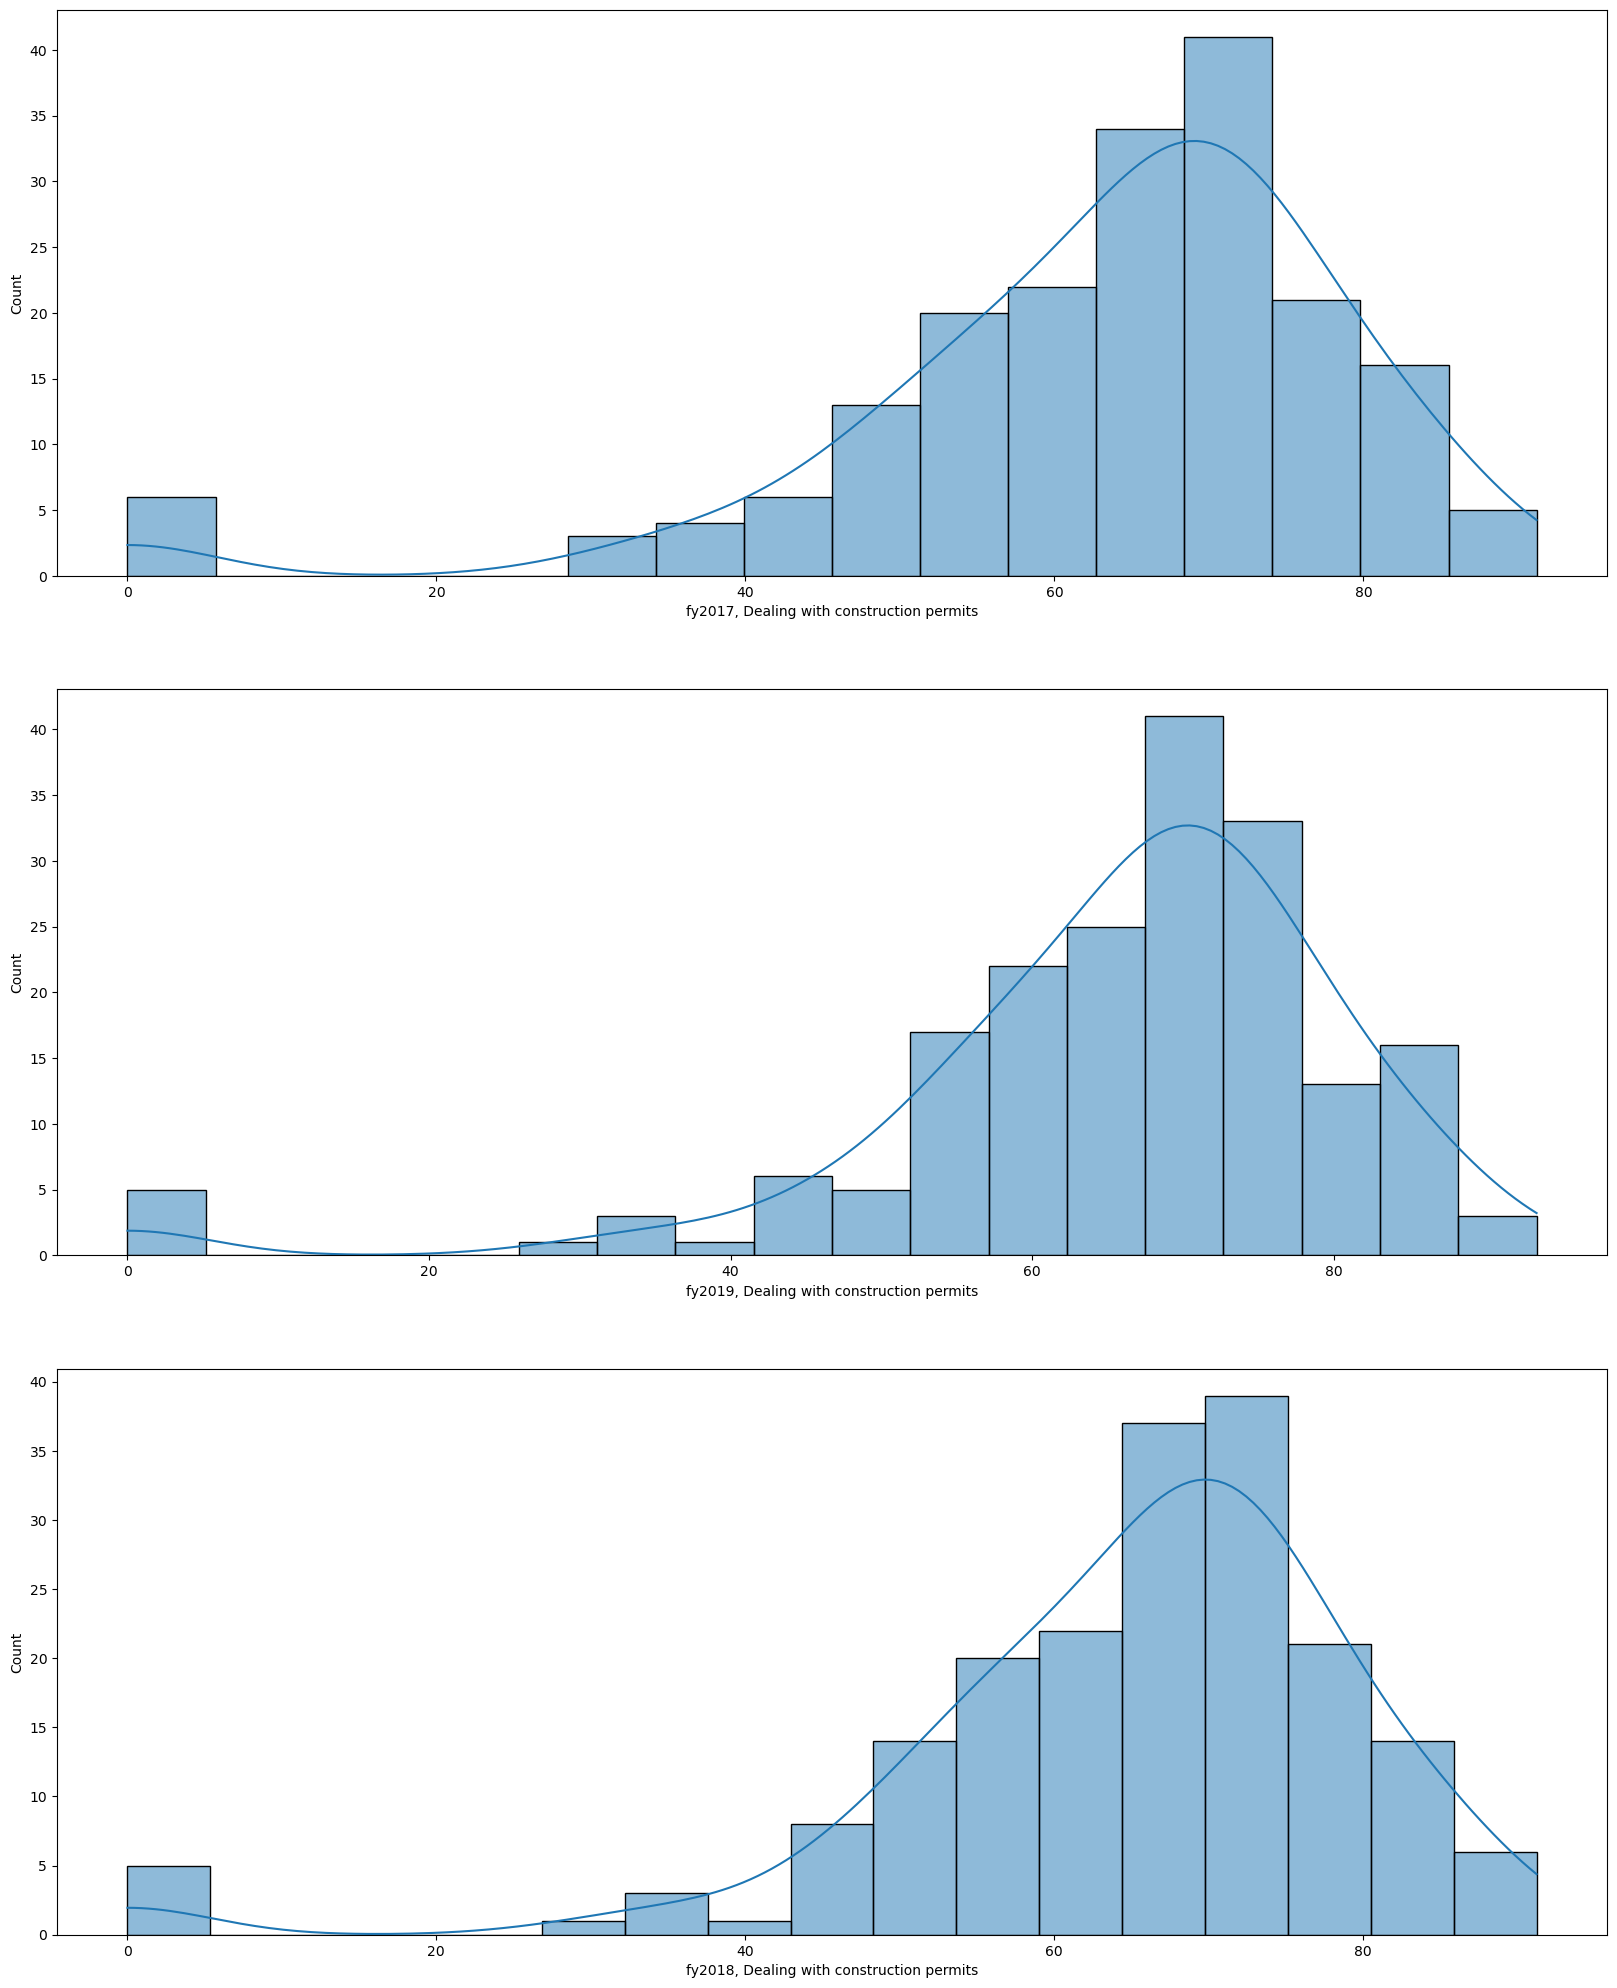

In [17]:
figure=plt.figure(figsize=(20,25))
for i in range(1,4):
    plt.subplot(3,1,i)
    sns.histplot(df.iloc[:,i],kde=True)

<Axes: xlabel='fy2017, Dealing with construction permits'>

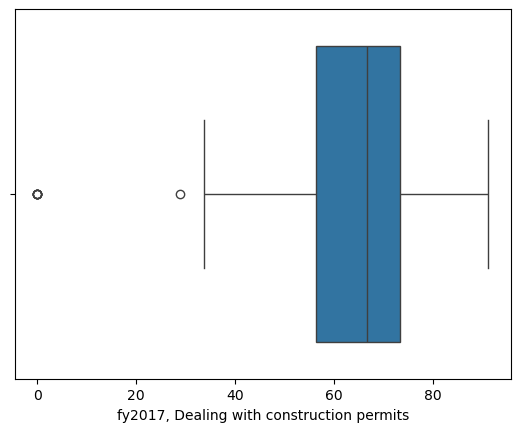

In [19]:
sns.boxplot(x = "fy2017, Dealing with construction permits",data = df)

<Axes: xlabel='fy2019, Dealing with construction permits'>

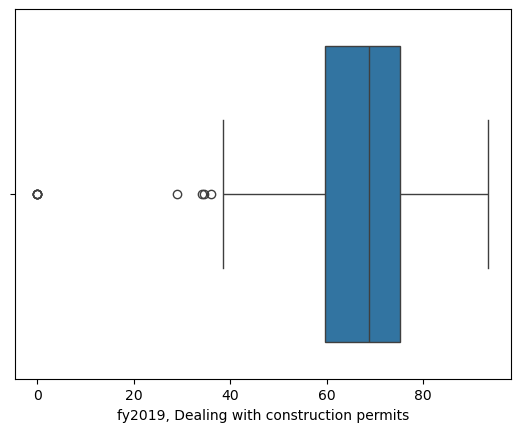

In [21]:
sns.boxplot(x="fy2019, Dealing with construction permits",data = df)

<Axes: xlabel='fy2018, Dealing with construction permits'>

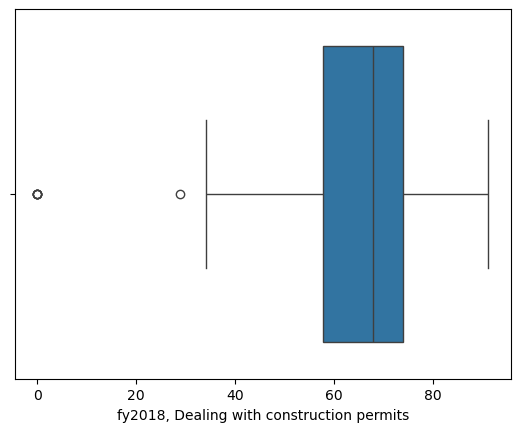

In [23]:
sns.boxplot(x="fy2018, Dealing with construction permits",data = df)

In [ ]:
# Numerical data for Clustering

In [25]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['red','blue','green','yellow','pink','cyan'])

In [27]:
df.rename(columns = {"fy2017, Dealing with construction permits":"fy2017",
                     "fy2019, Dealing with construction permits":"fy2019",
                     "fy2018, Dealing with construction permits":"fy2018"},
          inplace = True)

In [ ]:
# Calculating IQR to handle outliers 

In [29]:
Q1 = df['fy2017'].quantile(0.25)
print("Lower quantile ",Q1)
Q3 = df['fy2017'].quantile(0.75)
print("Upper quantile ",Q3)

Lower quantile  56.300934999999996
Upper quantile  73.40780000000001


In [31]:
IQR1 = Q3-Q1
print(IQR1)

17.106865000000013


In [33]:
lower_limit1=Q1-1.5*IQR1
print('Lower limit: ',lower_limit1)
upper_limit1=Q3+1.5*IQR1
print('Upper limit: ',upper_limit1)

Lower limit:  30.640637499999976
Upper limit:  99.06809750000002


In [35]:
df.loc[df['fy2017']<lower_limit1]

,country,fy2017,fy2019,fy2018
50,ERI,0.00000,0.00000,0.00000
96,LBR,28.93852,28.93852,28.93852
97,LBY,0.00000,0.00000,0.00000
99,LIE,0.00000,83.51370,83.52035
154,SOM,0.00000,0.00000,0.00000
164,SYR,0.00000,0.00000,0.00000
187,YEM,0.00000,0.00000,0.00000


In [37]:
df.loc[df['fy2017']>upper_limit1]

,country,fy2017,fy2019,fy2018


In [39]:
len(df)

191

In [41]:
len(df.loc[df['fy2017']<lower_limit1]) / len(df) *100

3.664921465968586

In [43]:
df.loc[df['fy2017']<lower_limit1,'fy2017'] = df['fy2017'].median()

<Axes: xlabel='fy2017'>

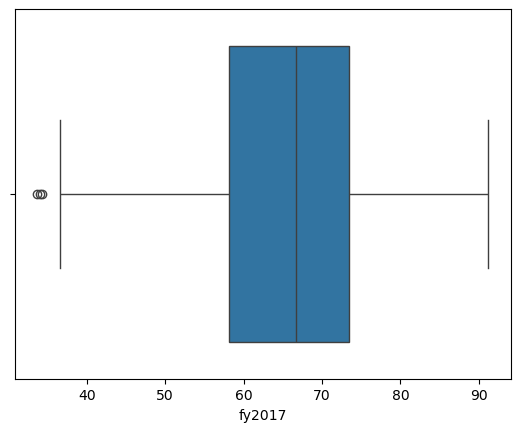

In [45]:
sns.boxplot(x = 'fy2017',data = df)

In [47]:
len(df.loc[df['fy2017']<lower_limit1]) / len(df) *100

0.0

In [49]:
Q1 = df['fy2018'].quantile(0.25)
print("Lower quantile ",Q1)
Q3 = df['fy2018'].quantile(0.75)
print("Upper quantile ",Q3)

Lower quantile  57.710025
Upper quantile  73.913715


In [51]:
IQR2 = Q3-Q1
print(IQR2)

16.203689999999995


In [53]:
lower_limit2=Q1-1.5*IQR2
print('Lower limit: ',lower_limit2)
upper_limit2=Q3+1.5*IQR2
print('Upper limit: ',upper_limit2)

Lower limit:  33.40449000000001
Upper limit:  98.21924999999999


In [55]:
df.loc[df['fy2018']<lower_limit2]

,country,fy2017,fy2019,fy2018
50,ERI,66.6942,0.00000,0.00000
96,LBR,66.6942,28.93852,28.93852
97,LBY,66.6942,0.00000,0.00000
154,SOM,66.6942,0.00000,0.00000
164,SYR,66.6942,0.00000,0.00000
187,YEM,66.6942,0.00000,0.00000


In [57]:
df.loc[df['fy2018']>upper_limit2]

,country,fy2017,fy2019,fy2018


In [59]:
len(df.loc[df['fy2018']<lower_limit2]) / len(df) *100

3.1413612565445024

In [61]:
df.loc[df['fy2018']<lower_limit2,'fy2018'] = df['fy2018'].median()

<Axes: xlabel='fy2018'>

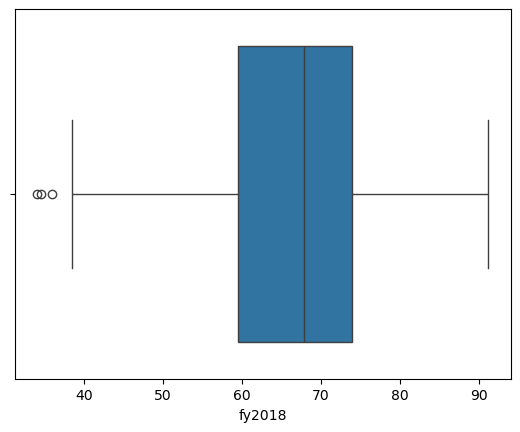

In [63]:
sns.boxplot(x = 'fy2018',data = df)

In [65]:
len(df.loc[df['fy2018']<lower_limit2]) / len(df) *100

0.0

In [67]:
Q1 = df['fy2019'].quantile(0.25)
print("Lower quantile ",Q1)
Q3 = df['fy2019'].quantile(0.75)
print("Upper quantile ",Q3)

Lower quantile  59.640150000000006
Upper quantile  75.18295499999999


In [69]:
IQR3 = Q3-Q1
print(IQR3)

15.542804999999987


In [75]:
lower_limit3=Q1-1.5*IQR3
print('Lower limit: ',lower_limit3)
upper_limit3=Q3+1.5*IQR3
print('Upper limit: ',upper_limit3)

Lower limit:  36.325942500000025
Upper limit:  98.49716249999997


In [77]:
df.loc[df['fy2019']<lower_limit3]

,country,fy2017,fy2019,fy2018
0,AFG,33.70269,34.53602,34.53602
27,CAF,34.09510,34.09510,34.09510
50,ERI,66.69420,0.00000,67.94367
96,LBR,66.69420,28.93852,67.94367
97,LBY,66.69420,0.00000,67.94367
107,MDG,34.22959,35.89625,35.89625
154,SOM,66.69420,0.00000,67.94367
164,SYR,66.69420,0.00000,67.94367
187,YEM,66.69420,0.00000,67.94367


In [79]:
df.loc[df['fy2019']>upper_limit3]

,country,fy2017,fy2019,fy2018


In [81]:
len(df.loc[df['fy2019']<lower_limit3]) / len(df) *100

4.712041884816754

In [83]:
df.loc[df['fy2019']<lower_limit1,'fy2019'] = df['fy2019'].median()

<Axes: xlabel='fy2019'>

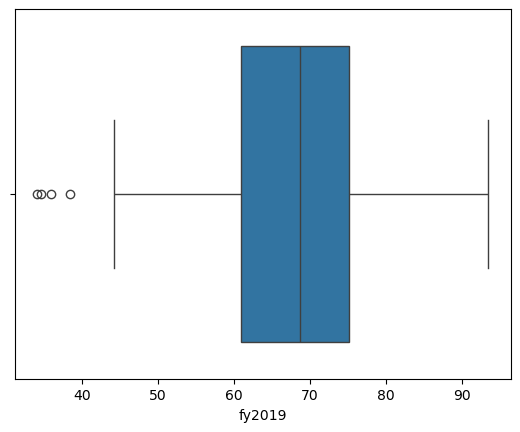

In [85]:
sns.boxplot(x = 'fy2019',data = df)

In [87]:
len(df.loc[df['fy2019']<lower_limit3]) / len(df) *100

1.5706806282722512

In [89]:
df.head()

,country,fy2017,fy2019,fy2018
0,AFG,33.70269,34.53602,34.53602
1,AGO,64.57157,65.32993,64.99177
2,ALB,52.60171,52.67715,52.64734
3,ARE,86.51006,89.75407,86.52729
4,ARG,48.96341,56.44015,49.26822


In [91]:
X = df[['fy2017','fy2019','fy2018']]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


### Insight: Checking for missing values ensures data quality for clustering algorithms like KMeans.

In [93]:
X.isnull().sum()

fy2017    0
fy2019    0
fy2018    0
dtype: int64

In [95]:
type(X)

pandas.core.frame.DataFrame

In [97]:
X.shape

(191, 3)

### Insight: Importing necessary libraries to handle data manipulation, visualization, and clustering.

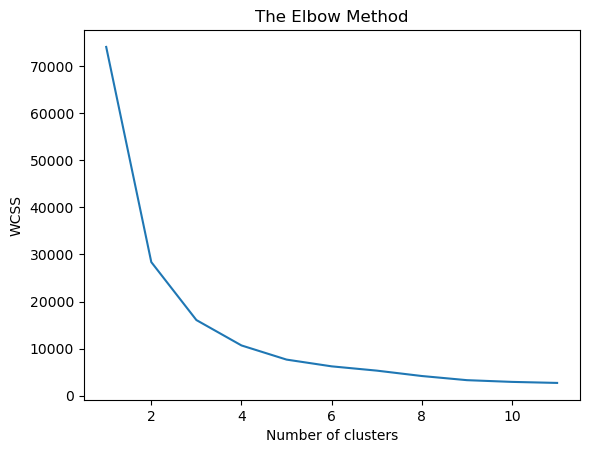

In [101]:
#Elbow Method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
wcss

[74075.90604350322,
 28379.625308448136,
 16068.570306506434,
 10675.166190175174,
 7668.794712851402,
 6235.658550464475,
 5327.806845585255,
 4181.551573039236,
 3301.253200300137,
 2933.927218968686,
 2715.2815348975573]

## Model Building

### Insight: Importing necessary libraries to handle data manipulation, visualization, and clustering.

In [106]:
# Initialise the model with K as 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [108]:
df.head()

,country,fy2017,fy2019,fy2018
0,AFG,33.70269,34.53602,34.53602
1,AGO,64.57157,65.32993,64.99177
2,ALB,52.60171,52.67715,52.64734
3,ARE,86.51006,89.75407,86.52729
4,ARG,48.96341,56.44015,49.26822


In [110]:
label=model.labels_
label

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [112]:
model.cluster_centers_

array([[49.96554565, 52.75806152, 51.35399022],
       [66.2249167 , 68.61432   , 67.5216501 ],
       [79.16893125, 80.77548667, 79.95782438]])

### Insight: Importing necessary libraries to handle data manipulation, visualization, and clustering.

In [114]:
from collections import Counter
Counter(label)

Counter({1: 97, 2: 48, 0: 46})

In [116]:
df.head()

,country,fy2017,fy2019,fy2018
0,AFG,33.70269,34.53602,34.53602
1,AGO,64.57157,65.32993,64.99177
2,ALB,52.60171,52.67715,52.64734
3,ARE,86.51006,89.75407,86.52729
4,ARG,48.96341,56.44015,49.26822


### Insight: Visualizing clusters helps interpret how well-separated the clusters are in feature space.

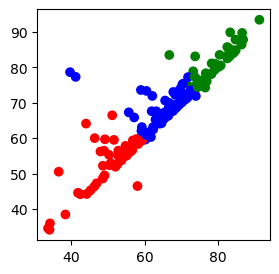

In [120]:
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.figure(figsize=(3,3))
#plt.figure()
plt.scatter(X.fy2017,X.fy2019,color=color_scheme[model.labels_]);

### Insight: Predicting clusters for each data point helps in segmenting the dataset based on similarity.

In [122]:
new_point=[[15,40,100]] # A new observation
model.predict(new_point) # predicted label

array([0], dtype=int32)

In [124]:
df['Labels']=label
df

,country,fy2017,fy2019,fy2018,Labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,2
4,ARG,48.96341,56.44015,49.26822,0
...,...,...,...,...,...
186,XKX,50.29844,55.28702,52.87432,0
187,YEM,66.69420,68.68324,67.94367,1
188,ZAF,68.26741,68.32331,68.24925,1
189,ZMB,71.10859,72.09460,71.72488,1


In [126]:
## Label 0

In [128]:
(df.loc[df['Labels']==0].iloc[:,3].mean(),
 df.loc[df['Labels']==0].iloc[:,1].mean(),
 df.loc[df['Labels']==0].iloc[:,2].mean())

(51.3539902173913, 49.965545652173915, 52.75806152173913)

In [130]:
## Label 1

In [132]:
(df.loc[df['Labels']==1].iloc[:,3].mean(),
 df.loc[df['Labels']==1].iloc[:,1].mean(),
 df.loc[df['Labels']==1].iloc[:,2].mean())

(67.52165010309278, 66.22491670103092, 68.61432)

In [134]:
## Label 2

In [136]:
(df.loc[df['Labels']==2].iloc[:,3].mean(),
 df.loc[df['Labels']==2].iloc[:,1].mean(),
 df.loc[df['Labels']==2].iloc[:,2].mean())

(79.95782437500002, 79.16893125, 80.77548666666667)

In [ ]:
# From the above means of performance indices, we can see that the model clustered countries according to ease of dealing with construction permits:

# Label 1: Countries with least performance
# Label 0: Countries with the highest performance
# Label 2: Countries with reasonably good performance

### Insight: Loading the dataset. It's important to understand the structure of the data before applying clustering.

In [138]:
df0=pd.read_csv("main_data.csv") # original with country codes
df['country']=df0['country']
df.head()

,country,fy2017,fy2019,fy2018,Labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,2
4,ARG,48.96341,56.44015,49.26822,0


In [140]:
label

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [142]:
df.head()

,country,fy2017,fy2019,fy2018,Labels
0,AFG,33.70269,34.53602,34.53602,0
1,AGO,64.57157,65.32993,64.99177,1
2,ALB,52.60171,52.67715,52.64734,0
3,ARE,86.51006,89.75407,86.52729,2
4,ARG,48.96341,56.44015,49.26822,0


In [144]:
label

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [146]:
least=[]
moderate=[]
highest=[]

for i in range(len(df)):
    if label[i]==0:
        highest.append(df['country'][i])
    elif label[i]==1:
        least.append(df['country'][i])
    else:
        moderate.append(df['country'][i])

In [148]:
print("Countries with least regulatory performance: \n",least)

Countries with least regulatory performance: 
 ['AGO', 'ARM', 'ATG', 'AZE', 'BEN', 'BFA', 'BGD', 'BHS', 'BLR', 'BLZ', 'BOL', 'BRN', 'BTN', 'CAN', 'CHE', 'CHN', 'COG', 'COL', 'COM', 'CRI', 'CYP', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'FJI', 'FSM', 'GHA', 'GIN', 'GRC', 'GRD', 'GTM', 'HUN', 'IDN', 'IND', 'IRN', 'IRQ', 'ISL', 'ITA', 'JAM', 'JOR', 'KEN', 'KGZ', 'KNA', 'KWT', 'LAO', 'LBR', 'LBY', 'LKA', 'LVA', 'MDV', 'MEX', 'MHL', 'MLI', 'MLT', 'MMR', 'MOZ', 'MRT', 'MWI', 'NAM', 'NGA', 'NLD', 'NPL', 'PAN', 'PER', 'PHL', 'PLW', 'PNG', 'PRI', 'PRT', 'PRY', 'RWA', 'SDN', 'SEN', 'SMR', 'SOM', 'STP', 'SUR', 'SVN', 'SWZ', 'SYC', 'SYR', 'THA', 'TJK', 'TON', 'TTO', 'TUR', 'UGA', 'UZB', 'WSM', 'YEM', 'ZAF', 'ZMB']


In [150]:
print("Countries with reasonable regulatory performance: \n",moderate)

Countries with reasonable regulatory performance: 
 ['ARE', 'AUS', 'AUT', 'BEL', 'BGR', 'BHR', 'BWA', 'CHL', 'CPV', 'DEU', 'DNK', 'EST', 'FIN', 'FRA', 'GBR', 'GEO', 'HKG', 'IRL', 'ISR', 'JPN', 'KAZ', 'KOR', 'LCA', 'LIE', 'LTU', 'LUX', 'MAR', 'MKD', 'MNE', 'MNG', 'MUS', 'MYS', 'NOR', 'NZL', 'OMN', 'POL', 'QAT', 'RUS', 'SAU', 'SGP', 'SRB', 'SWE', 'TUN', 'TWN', 'UKR', 'USA', 'VCT', 'VNM']


In [152]:
print("Countries with highest regulatory performance: \n",highest)

Countries with highest regulatory performance: 
 ['AFG', 'ALB', 'ARG', 'BDI', 'BIH', 'BRA', 'BRB', 'CAF', 'CIV', 'CMR', 'COD', 'CZE', 'ETH', 'GAB', 'GMB', 'GNB', 'GNQ', 'GUY', 'HND', 'HRV', 'HTI', 'KHM', 'KIR', 'LBN', 'LSO', 'MDA', 'MDG', 'NER', 'NIC', 'PAK', 'PSE', 'ROU', 'SLB', 'SLE', 'SLV', 'SSD', 'SVK', 'TCD', 'TGO', 'TLS', 'TZA', 'URY', 'VEN', 'VUT', 'XKX', 'ZWE']


### Insight: Importing necessary libraries to handle data manipulation, visualization, and clustering.

In [154]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.49612202934048727